In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('road_accident_dataset.csv')
df

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,Germany,2023,June,Wednesday,Evening,Rural,Main Road,Foggy,351.740871,4,...,0,37.405598,1907.208566,Icy,Speeding,3,18640.125887,50695.311876,Asia,173.307333
131996,Brazil,2023,January,Tuesday,Morning,Rural,Main Road,Foggy,95.563567,1,...,4,17.054490,2706.253339,Dry,Drunk Driving,2,48161.129965,20260.167191,Asia,4375.443810
131997,Russia,2021,March,Wednesday,Afternoon,Urban,Street,Clear,74.112102,3,...,3,55.558876,6860.161645,Dry,Speeding,9,24696.058692,8132.133502,Asia,4196.244517
131998,Australia,2002,May,Tuesday,Morning,Urban,Street,Rainy,276.612565,3,...,2,19.100498,1523.299088,Wet,Speeding,8,13486.716680,17607.573072,Europe,2911.904030


### Understand Dataset

In [39]:
df.shape

(132000, 30)

In [40]:
df.columns


Index(['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural',
       'Road Type', 'Weather Conditions', 'Visibility Level',
       'Number of Vehicles Involved', 'Speed Limit', 'Driver Age Group',
       'Driver Gender', 'Driver Alcohol Level', 'Driver Fatigue',
       'Vehicle Condition', 'Pedestrians Involved', 'Cyclists Involved',
       'Accident Severity', 'Number of Injuries', 'Number of Fatalities',
       'Emergency Response Time', 'Traffic Volume', 'Road Condition',
       'Accident Cause', 'Insurance Claims', 'Medical Cost', 'Economic Loss',
       'Region', 'Population Density'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

In [42]:
df.describe(include="object")  # For categorical data

,Country,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Driver Age Group,Driver Gender,Vehicle Condition,Accident Severity,Road Condition,Accident Cause,Region
count,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000,132000
unique,10,12,7,4,2,3,5,5,2,3,3,4,5,5
top,Canada,May,Tuesday,Night,Rural,Main Road,Windy,<18,Male,Good,Minor,Wet,Drunk Driving,Australia
freq,13349,11158,19061,33231,66502,44197,26626,26524,66098,44094,44063,33356,26506,26625


In [43]:
df.describe()  # For numerical data

,Year,Visibility Level,Number of Vehicles Involved,Speed Limit,Driver Alcohol Level,Driver Fatigue,Pedestrians Involved,Cyclists Involved,Number of Injuries,Number of Fatalities,Emergency Response Time,Traffic Volume,Insurance Claims,Medical Cost,Economic Loss,Population Density
count,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000
mean,2011.973348,275.038776,2.501227,74.544068,0.125232,0.500576,1.000773,0.998356,9.508205,1.995439,32.491746,5041.929098,4.495621,25198.454901,50437.505615,2506.476223
std,7.198624,129.923625,1.117272,26.001448,0.072225,0.500002,0.816304,0.817764,5.774366,1.412974,15.889537,2860.671611,2.867347,14274.771691,28584.290822,1440.646352
min,2000.000000,50.001928,1.000000,30.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,5.000177,100.062626,0.000000,500.110090,1000.335085,10.002669
25%,2006.000000,162.338860,2.000000,52.000000,0.062630,0.000000,0.000000,0.000000,5.000000,1.000000,18.732879,2560.601299,2.000000,12836.933596,25692.817343,1258.158299
50%,2012.000000,274.672990,3.000000,74.000000,0.125468,1.000000,1.000000,1.000000,9.000000,2.000000,32.534944,5037.909855,4.000000,25188.202669,50395.499874,2506.203333
75%,2018.000000,388.014111,3.000000,97.000000,0.187876,1.000000,2.000000,2.000000,15.000000,3.000000,46.289527,7524.638162,7.000000,37529.024899,75186.626093,3756.652950
max,2024.000000,499.999646,4.000000,119.000000,0.249999,1.000000,2.000000,2.000000,19.000000,4.000000,59.999588,9999.997468,9.000000,49999.930130,99999.622968,4999.991745


In [44]:
df.isnull().sum()


Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population Density             0
dtype: int

In [45]:
df.duplicated().sum()


np.int64(0)

### Check for Outliers

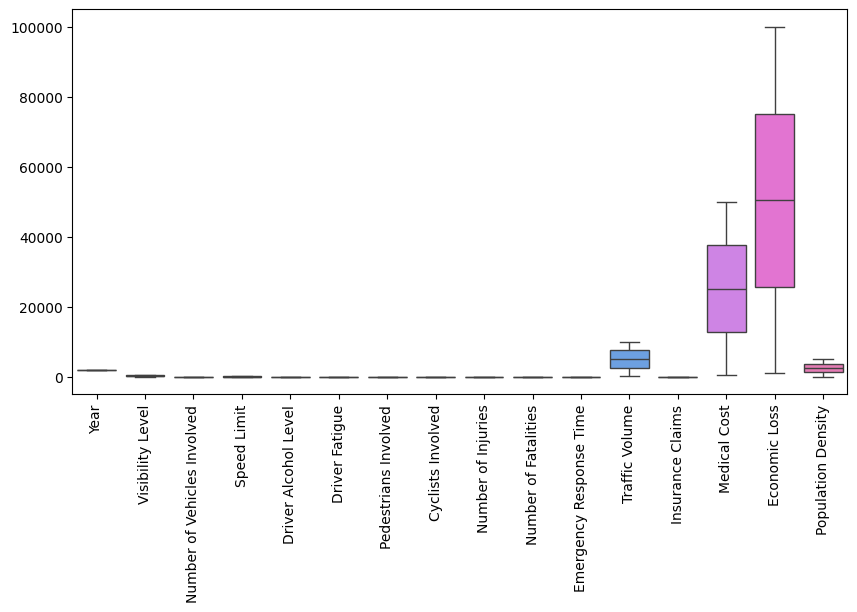

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

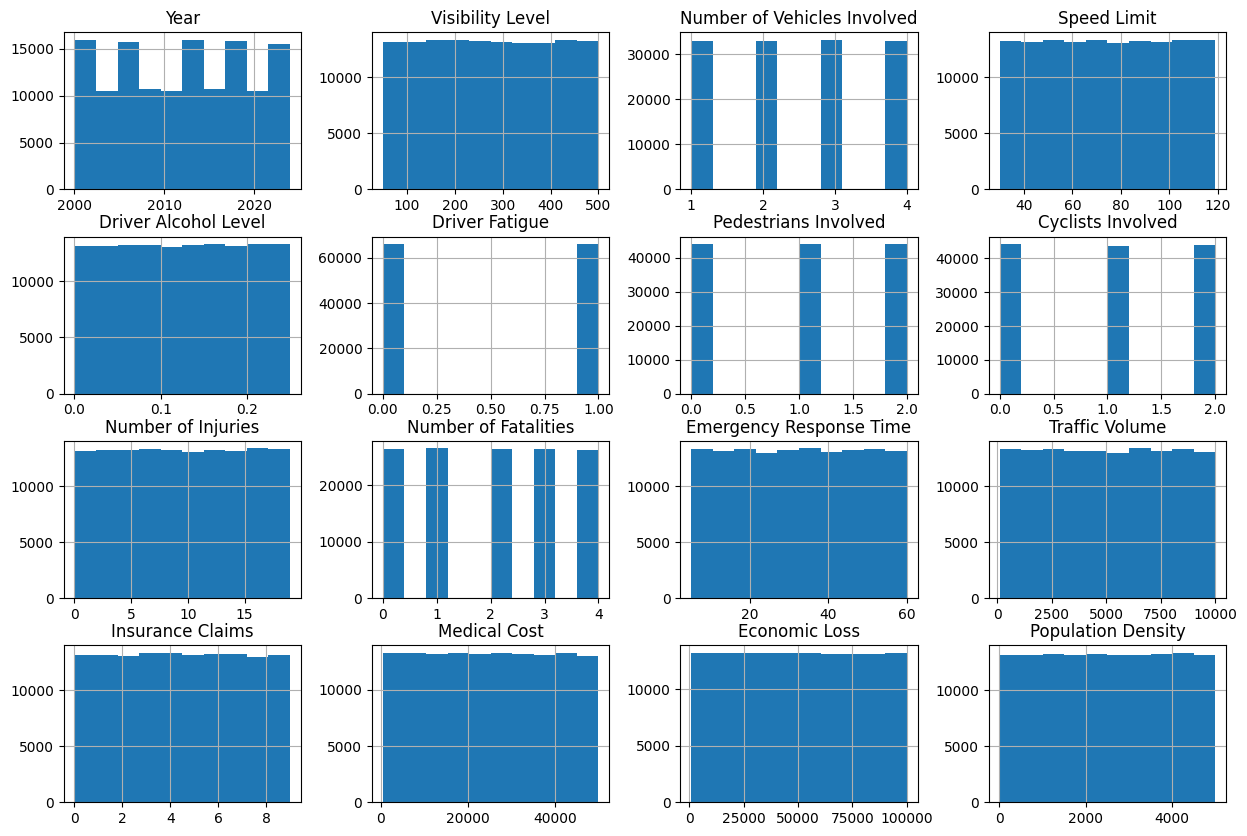

In [47]:
df.hist(figsize=(15,10))
plt.show()

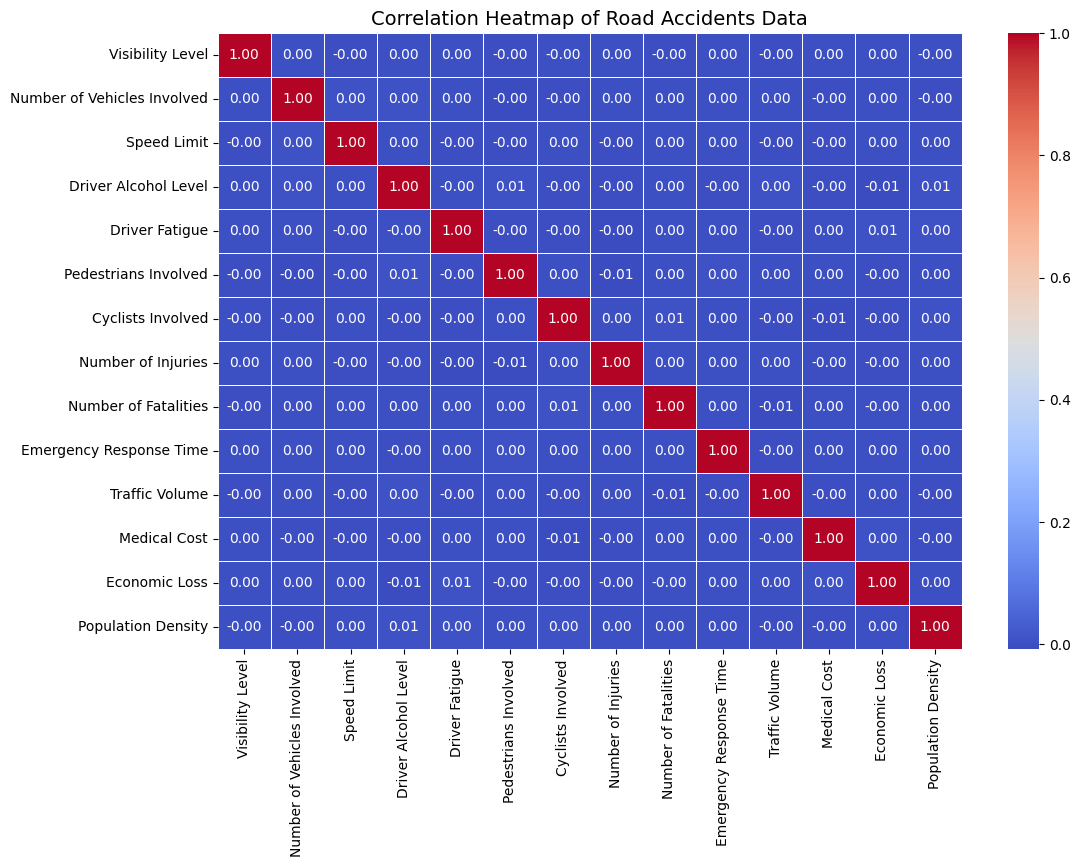

In [48]:
relevant_columns = [
    "Visibility Level", "Number of Vehicles Involved", "Speed Limit", 
    "Driver Alcohol Level", "Driver Fatigue", "Pedestrians Involved", 
    "Cyclists Involved", "Number of Injuries", "Number of Fatalities", 
    "Emergency Response Time", "Traffic Volume", "Medical Cost", 
    "Economic Loss", "Population Density"
]

# Compute correlation matrix
corr_matrix = df[relevant_columns].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Road Accidents Data", fontsize=14)
plt.show()

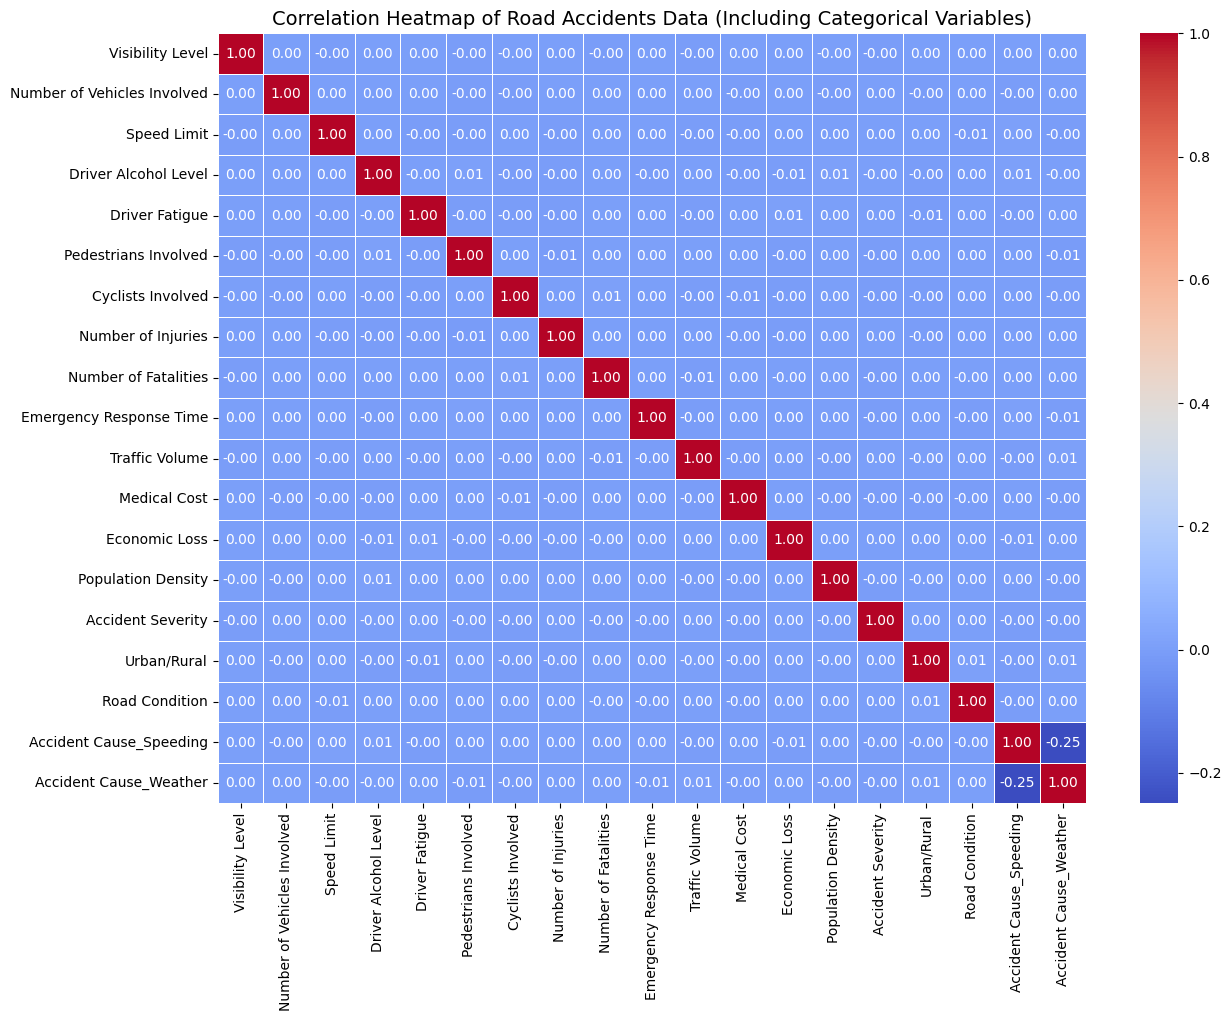

In [49]:
from sklearn.preprocessing import LabelEncoder

numerical_columns = [
    "Visibility Level", "Number of Vehicles Involved", "Speed Limit", 
    "Driver Alcohol Level", "Driver Fatigue", "Pedestrians Involved", 
    "Cyclists Involved", "Number of Injuries", "Number of Fatalities", 
    "Emergency Response Time", "Traffic Volume", "Medical Cost", 
    "Economic Loss", "Population Density"
]

# Encode ordinal categorical columns
label_encoders = {}
ordinal_columns = ["Accident Severity", "Urban/Rural", "Road Condition"]  

for col in ordinal_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoder for later use

# One-hot encode nominal categorical columns
nominal_columns = ["Weather Conditions", "Road Type", "Accident Cause"]  
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Select relevant columns
selected_columns = numerical_columns + ordinal_columns + list(df.columns[-len(nominal_columns) + 1:])  

# Compute correlation matrix
corr_matrix = df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Road Accidents Data (Including Categorical Variables)", fontsize=14)
plt.show()